## Business Understanding

Make a prediction for how long the customer will be a member


## Data Understanding
---

* Email
* Address
* Avatar
* Time on App
* Time on Website
* Length of Membership
* Yearly Amount Spent

### Download dataset

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iabdulw/ecommerce-customer-data 

ecommerce-customer-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Preparation

In [7]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score , mean_squared_error

In [8]:
# load dataset

df = pd.read_csv('/content/ecommerce-customer-data.zip')

### Fix Data Structure

In [9]:
# head a data

df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [10]:
df['Time on Ecommerce'] = df['Time on App'] + df['Time on Website']

In [11]:
# change columns name

df = df.rename(columns = {"\tEmail": "Email"})
df.columns

Index(['Email', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Time on Ecommerce'],
      dtype='object')

In [12]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
 7   Time on Ecommerce     500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
# data describe

df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Time on Ecommerce
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,12.052620,37.060480,3.53336,499.314240,49.113100
std,0.994418,1.010555,0.99926,79.314764,1.474947
min,8.510000,33.910000,0.27000,256.670000,43.970000
25%,11.390000,36.347500,2.93000,445.037500,48.197500
50%,11.980000,37.070000,3.53500,498.890000,49.050000
75%,12.752500,37.720000,4.13000,549.312500,50.102500
max,15.130000,40.010000,6.92000,765.520000,53.110000


### Handle missing value

In [14]:
# Check missing value

df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Time on Ecommerce       0
dtype: int64

### Data distribution

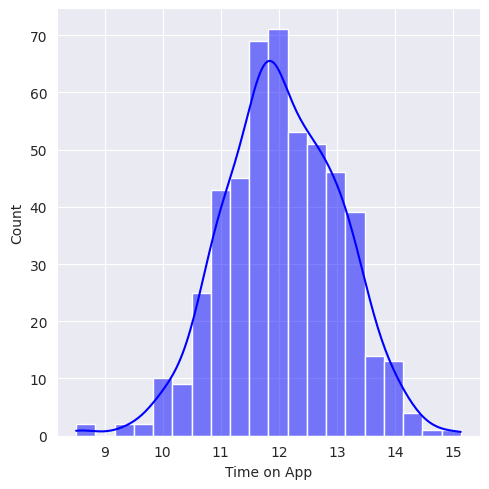

In [15]:
# time on app

sns.displot(df["Time on App"], kde= True, color="Blue")

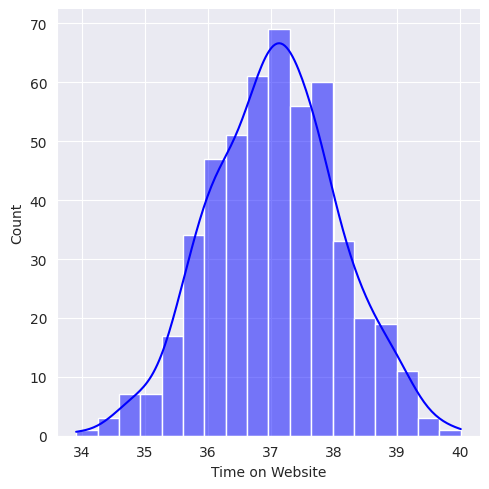

In [16]:
# time on website

sns.displot(df["Time on Website"], kde=True, color="Blue")

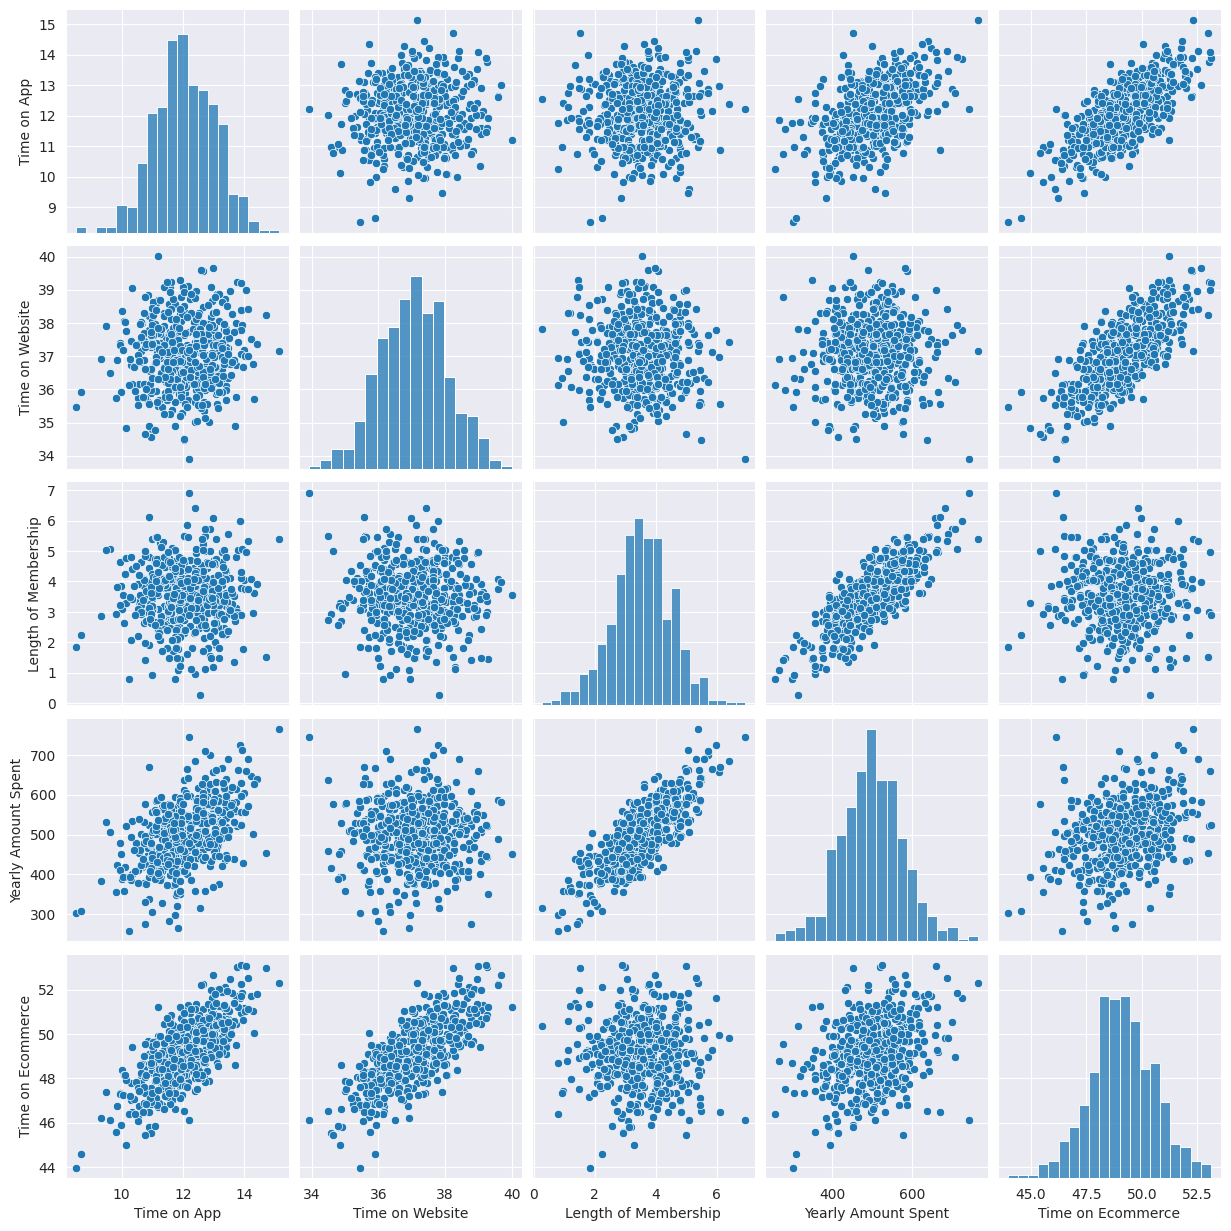

In [17]:
sns.pairplot(df)

<ipython-input-18-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

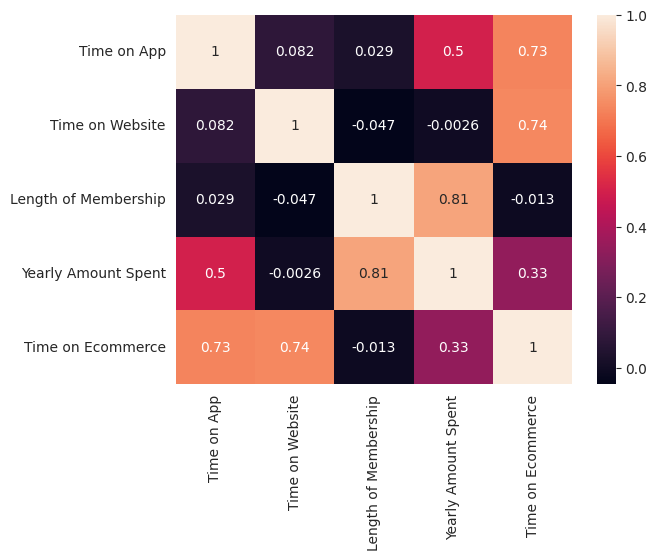

In [18]:
sns.heatmap(df.corr(), annot=True)

### Feature Scaling

In [19]:
# # create scaler

scaler = StandardScaler()

In [20]:
X = df[['Time on App', 'Time on Website', 'Yearly Amount Spent']]
y = df['Length of Membership']

In [21]:
# # fit and transform data

X = scaler.fit_transform(X)

## Modeling

In [22]:
random_states = [0, 42, 123, 456, 789]

In [23]:
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create linear regression object and train model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Evaluate model on test data
    score = reg.score(X_test, y_test)

    model = LinearRegression()

    # set hyperparameter to tune

    param_grid = {'copy_X': [True, False], 
                  'fit_intercept': [True, False], 
                  'n_jobs': [-1, 1], 
                  'positive': [True, False]}
    
    # perform a grid search

    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2')
    grid_search.fit(X_train, y_train)

    print('Best Hyperparameters: ', grid_search.best_params_)

    # use the best hyperparameters to train model

    lin_reg_best = LinearRegression(**grid_search.best_params_)
    lin_reg_best.fit(X_train, y_train)

    y_pred = lin_reg_best.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Random State : ', random_state)
    print('MSE : ', mse)
    print("R-Squared : ", r2)
    print("\n")

Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Random State :  0
MSE :  0.20852469357115133
R-Squared :  0.8128174759667687


Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Random State :  42
MSE :  0.1583300045599001
R-Squared :  0.7867772793873804


Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Random State :  123
MSE :  0.14707902459733238
R-Squared :  0.8804578250228803


Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Random State :  456
MSE :  0.169986152577747
R-Squared :  0.8666013845065423


Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Random State :  789
MSE :  0.1476439263934003
R-Squared :  0.8349264529994529




In [24]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [25]:
# create model

model = LinearRegression()

In [26]:
# set hyperparameter to tune

param_grid = {'copy_X': [True, False], 
              'fit_intercept': [True, False], 
              'n_jobs': [-1, 1], 
              'positive': [True, False]}

In [27]:
# perform a grid search

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1],
                         'positive': [True, False]},
             scoring='r2')

In [28]:
# print best hyperparameters

print('Best Hyperparameters: ', grid_search.best_params_)

Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [29]:
# use the best hyperparameters to train model

lin_reg_best = LinearRegression(**grid_search.best_params_)
lin_reg_best.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [30]:
# use the model to make predict on the testing set

y_pred = lin_reg_best.predict(X_test)

## Evaluation

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print('MSE : ', mse)
print("R-Squared : ", r2)

MSE :  0.14707902459733238
R-Squared :  0.8804578250228803


In [33]:
pd.DataFrame(y_pred)

,0
0,3.233488
1,2.550533
2,3.690377
3,4.197898
4,2.186996
...,...
95,2.576996
96,2.795775
97,3.237299
98,4.311271
